## Importing necessary libraries

In [1]:
# Data handling and manipulation libraries
import pandas as pd
import numpy as np

#Image extraction libraries
import os
from zipfile import ZipFile

#Image reading libraries
from PIL import Image
import matplotlib.pyplot as plt

#Data Preprocessing Libraries
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV

#ML Model
from sklearn.svm import SVC

#Model evaluation libraries
from sklearn.metrics import  accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

#  Importing the images

In [2]:
file_name='./expression_images_dataset.zip'
destination_path='./expression_images'

#Opening the zipfile in read mode
with ZipFile(file_name,'r') as zip:
    #Extracting all the files from zipfile
    print('extracting images...')
    #Checking if the destination path exists or not
    if(not os.path.exists(destination_path)):
        zip.extractall(path=destination_path)
        print('Done')
    else:
        print('Destination Folder already exists')

extracting images...
Destination Folder already exists


#  Reading the images

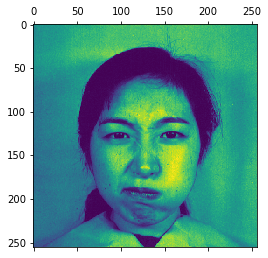

In [3]:
im=Image.open('./expression_images/images/KA.AN1.39.tiff')
#im_array=np.array(im)
plt.matshow(im)

##  Loading the expressions DataFrame

In [4]:
df=pd.read_csv('./expression_images/data.csv')
df.head()

,filepath,student,facial_expression
0,images/KA.AN1.39.tiff,KA,angry
1,images/KA.AN2.40.tiff,KA,angry
2,images/KA.AN3.41.tiff,KA,angry
3,images/KA.DI1.42.tiff,KA,disgust
4,images/KA.DI2.43.tiff,KA,disgust


In [5]:
df['facial_expression'].value_counts()

fear         32
happiness    31
sadness      31
angry        30
neutral      30
surprise     30
disgust      29
Name: facial_expression, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   filepath           213 non-null    object
 1   student            192 non-null    object
 2   facial_expression  213 non-null    object
dtypes: object(3)
memory usage: 5.1+ KB


In [7]:
df['facial_expression'].nunique()

7

##  Data Preparation for Model Building

In [8]:
X=[]
for i in range(213):
    #print('./expression_images/'+df.iloc[i][0])
    path='./expression_images/'+df.iloc[i][0]
    im=Image.open(path)   
    
    #Converting the image into a numpy array of shape 256*256 image into a 1-dimensional array of length 65536
    im_array=np.array(im).reshape(65536)
    X.append(im_array)

In [9]:
X

[array([105, 102, 108, ..., 119, 113, 119], dtype=uint8),
 array([114, 115, 116, ..., 115, 105, 105], dtype=uint8),
 array([ 96,  98, 114, ..., 120, 116, 117], dtype=uint8),
 array([109, 118, 102, ..., 124, 138, 134], dtype=uint8),
 array([114, 118, 115, ..., 133, 130, 138], dtype=uint8),
 array([130, 128, 118, ..., 142, 141, 140], dtype=uint8),
 array([102, 114, 103, ..., 128, 127, 133], dtype=uint8),
 array([111, 113, 111, ..., 144, 134, 139], dtype=uint8),
 array([113, 116, 115, ..., 135, 142, 139], dtype=uint8),
 array([ 85,  82,  95, ..., 122, 127, 138], dtype=uint8),
 array([ 94,  92,  99, ..., 146, 148, 150], dtype=uint8),
 array([104, 111, 124, ..., 117, 121, 125], dtype=uint8),
 array([113, 105, 122, ..., 129, 142, 134], dtype=uint8),
 array([103,  89,  98, ..., 105,  96,  87], dtype=uint8),
 array([131, 135, 134, ..., 124, 130, 127], dtype=uint8),
 array([143, 140, 133, ..., 141, 121, 127], dtype=uint8),
 array([116, 102, 115, ...,  95, 100, 105], dtype=uint8),
 array([142, 1

In [10]:
len(X)

213

In [11]:
len(X[0])

65536

##  Standardizing the data or feature scaling

In [12]:
scalar=StandardScaler()
X=scalar.fit_transform(X)

In [13]:
X

array([[-0.43361499, -0.52131436, -0.41267217, ..., -0.09235734,
        -0.33892632, -0.09873761],
       [-0.17287474, -0.14313268, -0.17646344, ..., -0.25294603,
        -0.65538136, -0.65011503],
       [-0.69435525, -0.63767795, -0.23551563, ..., -0.05221017,
        -0.22025568, -0.17750581],
       ...,
       [ 1.33362453,  1.31141222,  1.15221065, ...,  1.393088  ,
         1.67847457,  1.24032185],
       [ 0.66728832,  1.02050324,  1.15221065, ...,  1.07191063,
         1.16423512,  0.92524904],
       [ 1.07288427,  0.90413965,  1.18173674, ...,  1.43323517,
         1.55980393,  1.71293107]])

##  Encoding the target variable

In [14]:
le=LabelEncoder()
y=le.fit_transform(df['facial_expression'])

In [15]:
y

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6,
       6, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6,
       6, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6,
       6, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 0,
       0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 0, 0,
       0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 0, 0, 0,
       1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 0, 0, 0, 1, 1,
       1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 0, 0, 0, 1, 1, 1,
       2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 0, 0, 0, 1, 1, 1, 2,
       2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6])

##  Train,test,split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

##  Model Building

In [17]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

##  Model evaluation

In [18]:
y_pred=model.predict(X_test)

In [19]:
accuracy_score(y_test,y_pred)

0.8604651162790697

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.86      1.00      0.92         6
           2       1.00      0.71      0.83         7
           3       0.86      0.67      0.75         9
           4       0.71      1.00      0.83         5
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         6

    accuracy                           0.86        43
   macro avg       0.87      0.89      0.87        43
weighted avg       0.88      0.86      0.86        43



##  Prediction for new data

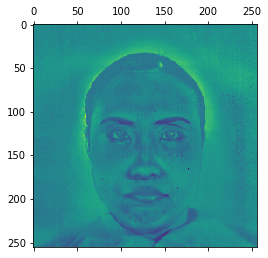

In [21]:
plt.matshow(X_test[13].reshape(256,256))

In [22]:
model.predict([X_test[13]])

array([1])

In [23]:
le.inverse_transform(model.predict([X_test[13]]))

array(['disgust'], dtype=object)

In [24]:
im=Image.open('./expression_images/Test/KA.SA1.33.tiff')   
    
#Converting the image into a numpy array of shape 256*256 image into a 1-dimensional array of length 65536
im_array=np.array(im).reshape(65536)

In [25]:
im_array

array([142, 135, 150, ..., 107, 116, 112], dtype=uint8)

In [26]:
test_image=scalar.fit_transform([im_array])

In [27]:
test_image

array([[0., 0., 0., ..., 0., 0., 0.]])

In [28]:
model.predict(test_image)

array([5])

In [29]:
le.inverse_transform(model.predict(test_image))

array(['sadness'], dtype=object)

##  Stratified KFold & Grid Search CV on SVM

In [30]:
X1=pd.DataFrame(X)
y1=pd.DataFrame(y)

In [31]:
stf=StratifiedKFold(n_splits=10)

In [32]:
stf.get_n_splits(X,y)

10

In [33]:
param={'gamma':['scale', 'auto'],'C':[0.1,1,10,100] }

In [34]:
model=SVC(kernel='linear')

In [35]:
gcv=GridSearchCV(estimator=model,param_grid=param,cv=10)

In [36]:
gcv.fit(X1,y1)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']})

In [37]:
gcv.best_params_

{'C': 0.1, 'gamma': 'scale'}

In [38]:
accuracy=[]
for train_index,test_index in stf.split(X,y):
    X1_train,X1_test=X1.iloc[train_index],X1.iloc[test_index]
    y1_train,y1_test=y1.iloc[train_index],y1.iloc[test_index]
    model.fit(X1_train,y1_train)
    y1_pred=model.predict(X1_test)
    accuracy.append(accuracy_score(y1_test,y1_pred))

In [39]:
accuracy

[0.5909090909090909,
 0.6818181818181818,
 0.5,
 0.19047619047619047,
 0.7142857142857143,
 0.2857142857142857,
 0.47619047619047616,
 0.5714285714285714,
 0.2857142857142857,
 0.5238095238095238]

In [40]:
np.mean(accuracy)

0.482034632034632